# Homework 4 - Decision Trees / Random Forests

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's the same data set as from HW3, so that way you'll be familiar with it.

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival
- Find if there are any important features related to patient survival

In this assignment, we will be using Clustering to identify clusters of patients, then seeing how well the various clustering methods work against the true clusters (classes). A good resource to use would be [Sci-Kit Learn's Clustering info](https://scikit-learn.org/stable/modules/clustering.html)

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW4.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using. Add any you want to use.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own.


In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data to remember what it looks like:

In [2]:
heart_df = pd.read_csv('data_hw4.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Part 1: Visual Analysis

In this HW, since you've had plenty of experience with visual analysis in general and on this data set, we are going to skip this part.

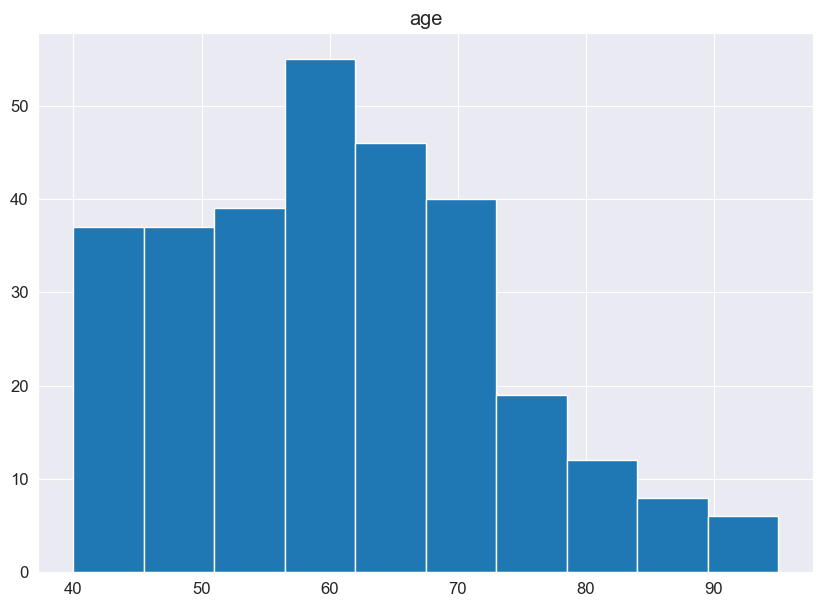

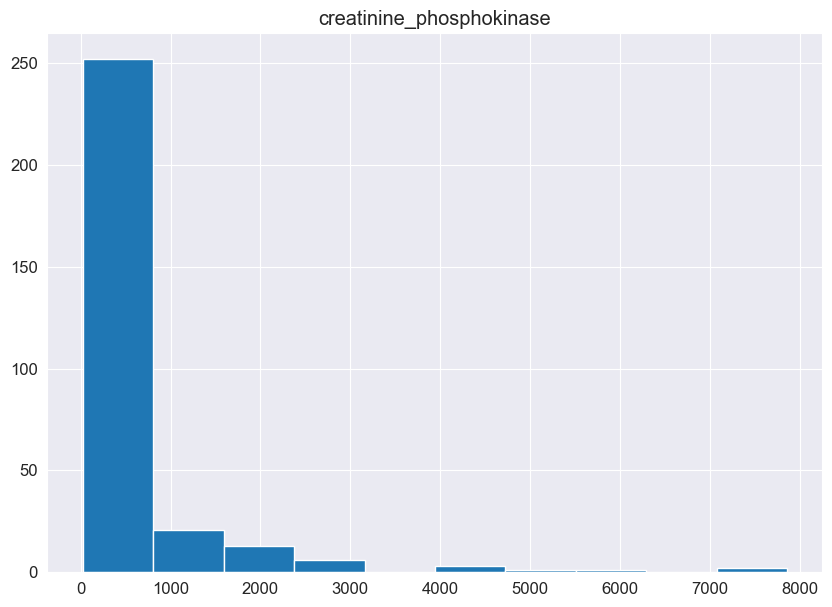

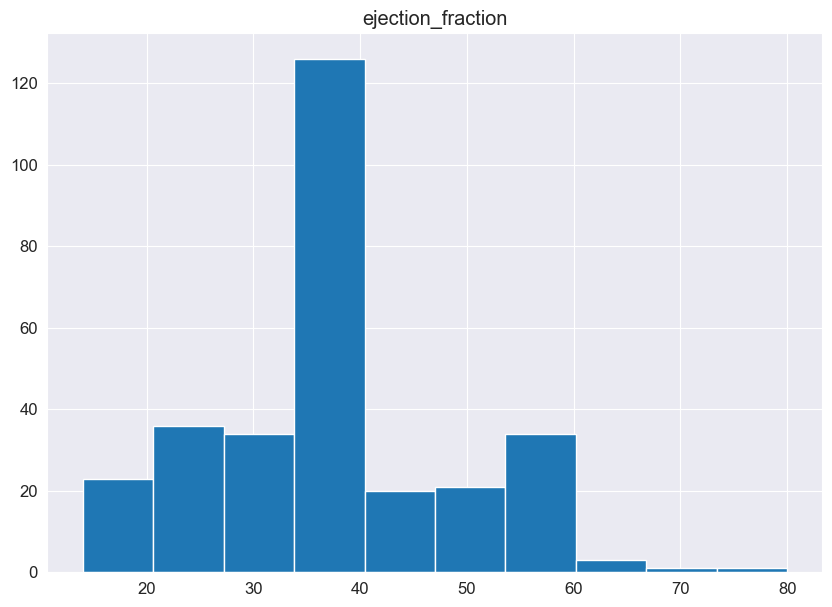

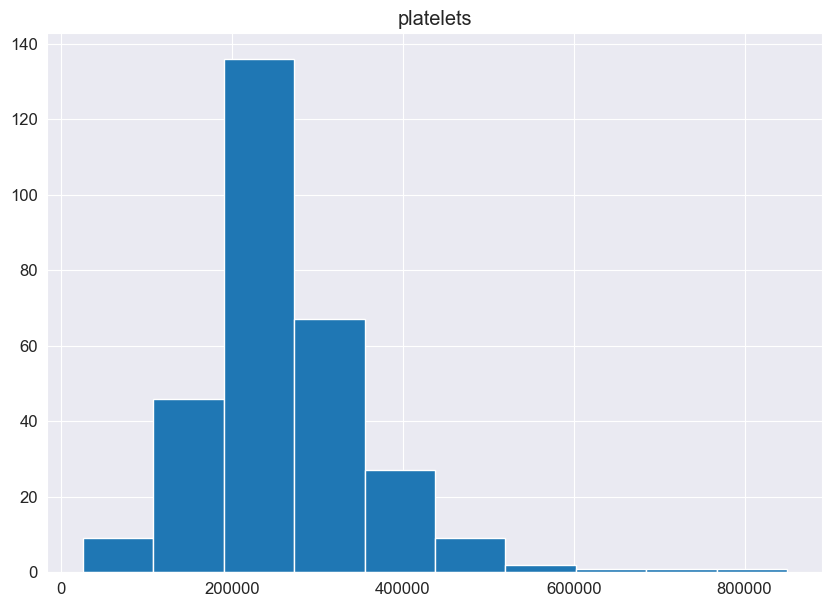

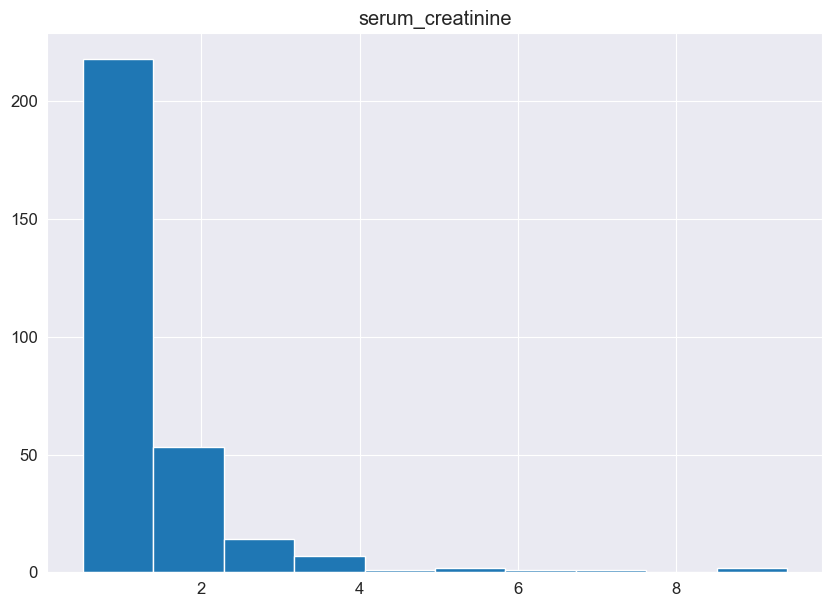

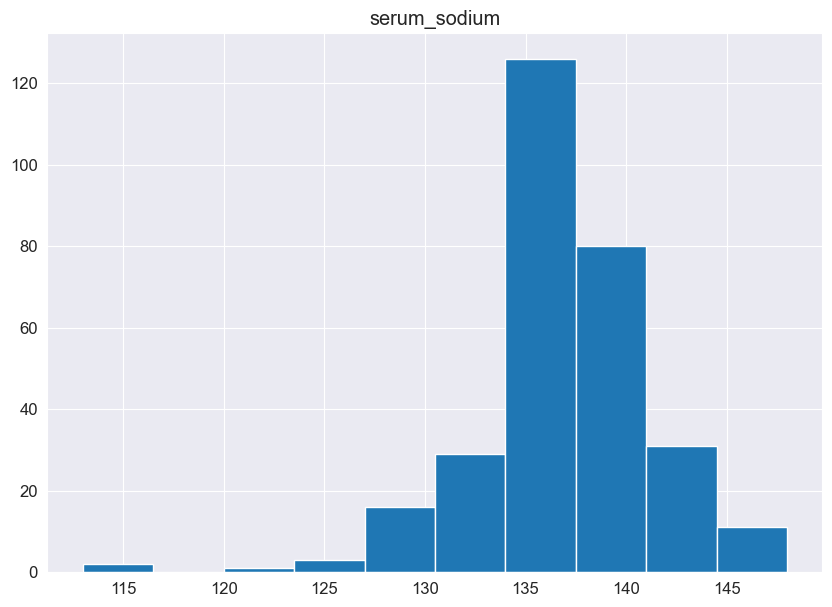

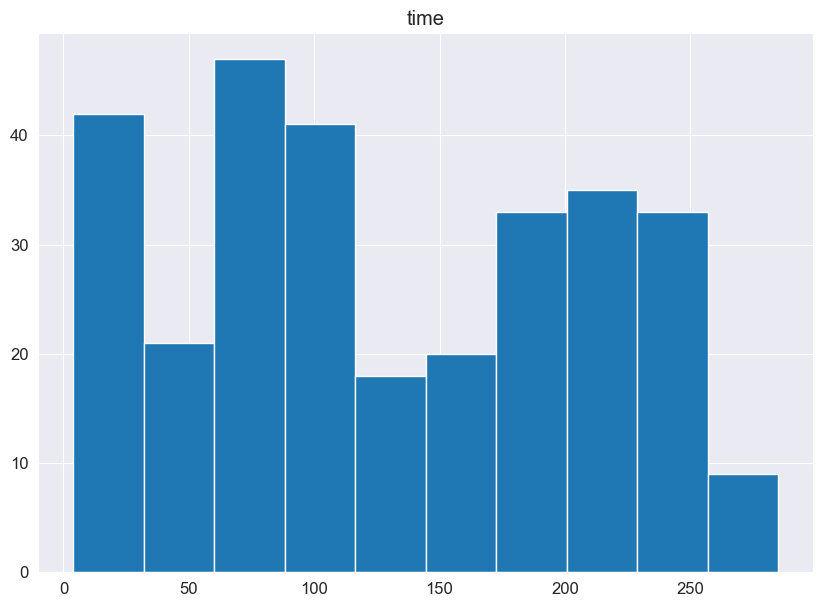

In [3]:
X = heart_df.drop('death', axis = 1)
y = heart_df['death']
variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for i in variables:
    plt.hist(x = heart_df[i])
    plt.title(i)
    plt.show()
# The non-binary variables (for the most part) do not follow a gaussian distribution closely enough for StandardScaler, thus I'll use MinMaxScaler

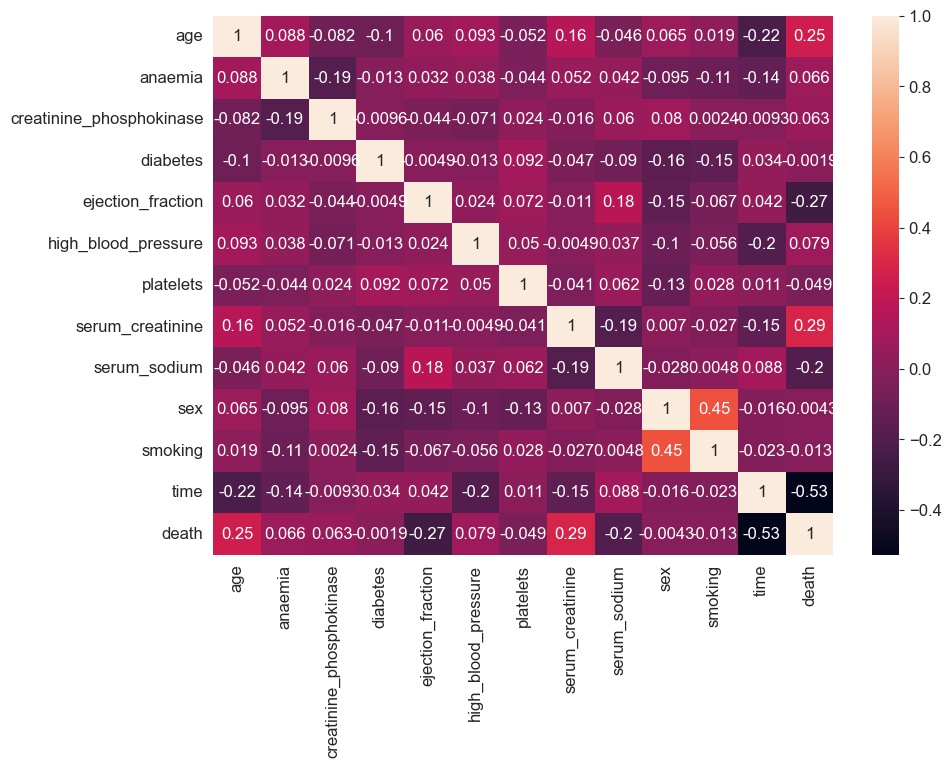

In [4]:
sns.heatmap(data = heart_df.corr(), annot = True)
plt.show()

# No major collinearity to worry about. The only large sources of correlation are mostly expected, like time and death, so it's not worth dropping anything

In [5]:
# Prior analysis in previous projects has already been performed on this dataset, so to avoid repeating myself I'll go ahead and lay out what's been found
# Most of the study's participants were 60 years old or older and demonstrated a fairly even distribution of living and dead participants between the two sexes
# Followup time is mostly random, although a majority fall within the first 100 days
# Serum sodium and ejection fraction demonstrate virtually zero correlation with one another despite being decently correlated with death, making them good candidates to be strong indicators of the result
# My previous findings have suggested that age, ejection fraction, serum ceratinine, and serum sodium are the most important variables for classification
# If clustering suggests the same, then I will be able to conclusively say that those four should be what the client looks to when determining a patient's risk level

In [6]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: death, dtype: int64

### Part 2: Clustering

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be entirely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

Your checklist of items to do will be as such:

1. Scale the data (5 pts)
2. Split it into training/testing sets (5 pts)
3. Cluster the patients using the 3 methods imported from sklearn.clustering (see above) (40 pts)
- As a note, you'll want to try and optimize the parameters within these models to have good accuracy as well as good generalization (no overfitting). 
- Also, if you can, try and rank your features to get a kind of feature importance (Think about how you might do this. There are multiple ways to do it.)
4. Write a report, which should have ample information on your methods, implementation, results, and various graphs/charts explaining how your model performed. How could you visualize the clusters or how well they performed? What issues might they have? What are some pros and cons of different methods? How well do your clustering results match the true clusters (classes)? The report has the following criteria (50 pts): 
- Should be at LEAST 2-3 paragraphs, and a paragraph is more than just 2-3 sentences.
- Explain your methods, including optimization techniques and WHY you used them
- Contain at LEAST 3 charts/graphs showcasing how well your methods predicted heart disease
- Remember, this is a data science project, so you should be thinking and exploring your data and models. What does the data tell us?

On this HW, it is very difficult to copy your friends, as it will be obvious. Cheating will result in an automatic zero, so make sure your work is original. The point of these HW assignments is for you to think, so if you simply tell me what you did or type definitions of methods to make your report seem long, you will lose points. Each HW assignment is graded in detail.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
MM = MinMaxScaler()
scaled_train = MM.fit_transform(X_train)
scaled_train = pd.DataFrame(scaled_train, columns = X_train.columns)
scaled_test = MM.fit_transform(X_test)
scaled_test = pd.DataFrame(scaled_test, columns = X_test.columns)
scaled_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.181818,1.0,0.004037,0.0,0.393939,0.0,0.307795,0.022727,0.800000,1.0,0.0,0.875445
1,0.454545,0.0,0.018752,0.0,0.242424,0.0,0.283550,0.022727,0.714286,0.0,0.0,0.647687
2,0.636364,0.0,0.084907,1.0,0.696970,0.0,0.290823,0.090909,0.342857,0.0,0.0,0.715302
3,0.000000,0.0,0.078265,0.0,0.318182,0.0,0.334465,0.045455,0.828571,1.0,1.0,0.747331
4,0.272727,0.0,0.094413,0.0,0.469697,0.0,0.288399,0.079545,0.685714,1.0,0.0,0.298932


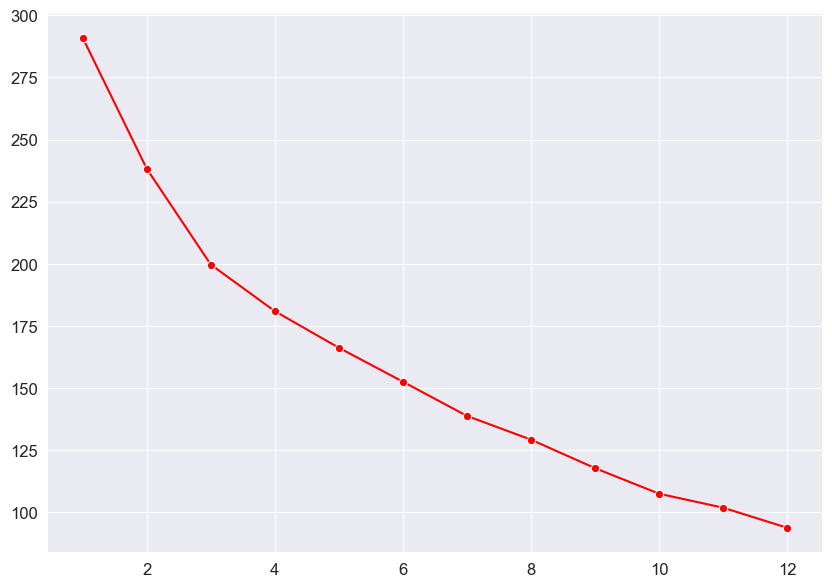

In [10]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 49)
    kmeans.fit(scaled_train)
    wcss.append(kmeans.inertia_)

sns.lineplot(x = range(1, 13), y = wcss, marker = 'o', color = 'red')
plt.show()
# Looks to be an elbow point @ 3 clusters, so we'll go with that moving forward

In [11]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 49)
kmeans.fit(scaled_train)
y_pred = kmeans.fit_predict(scaled_test)
score = silhouette_score(scaled_test, y_pred)
print("Silhouette Score:", score)

Silhouette Score: 0.20272212393015016


In [12]:
centroid_measures = pd.DataFrame(kmeans.cluster_centers_, columns = scaled_train.columns)
print(centroid_measures.idxmax(axis = 1))

# I think the binary nature of these variables is throwing off the clustering, so I'm going to redo this without them in the dataset

0             sex
1    serum_sodium
2             sex
dtype: object


In [13]:
scaled_no_bin = scaled_train.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1).copy()
scaled_no_bin_test = scaled_test.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1).copy()
scaled_no_bin.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.181818,0.004037,0.393939,0.307795,0.022727,0.800000,0.875445
1,0.454545,0.018752,0.242424,0.283550,0.022727,0.714286,0.647687
2,0.636364,0.084907,0.696970,0.290823,0.090909,0.342857,0.715302
3,0.000000,0.078265,0.318182,0.334465,0.045455,0.828571,0.747331
4,0.272727,0.094413,0.469697,0.288399,0.079545,0.685714,0.298932


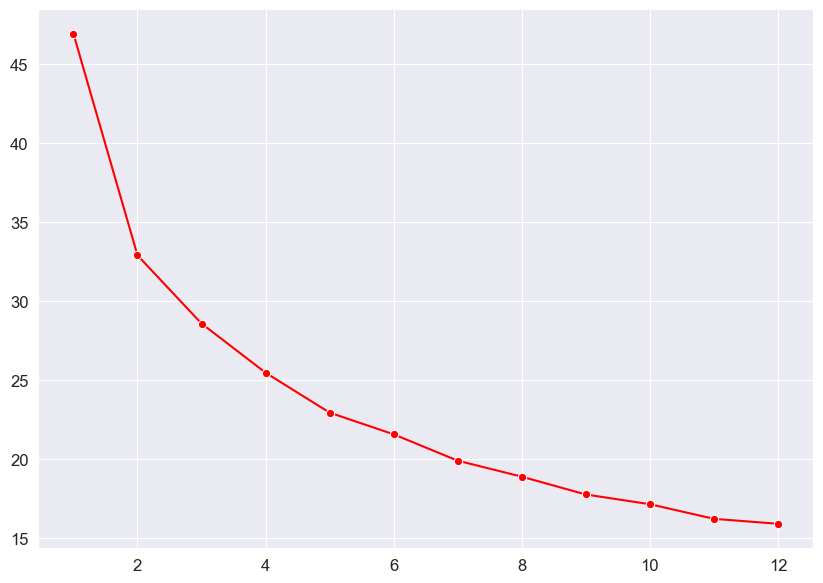

In [14]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 49)
    kmeans.fit(scaled_no_bin)
    wcss.append(kmeans.inertia_)

sns.lineplot(x = range(1, 13), y = wcss, marker = 'o', color = 'red')
plt.show()
# Abrupt elbow @ 2

In [15]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 49)
kmeans.fit(scaled_no_bin)
y_pred_no_bin = kmeans.fit_predict(scaled_no_bin_test)
score = silhouette_score(scaled_no_bin_test, y_pred_no_bin)
print("Silhouette Score:", score)

Silhouette Score: 0.215436907149116


In [16]:
centroid_measures = pd.DataFrame(kmeans.cluster_centers_, columns = scaled_no_bin.columns)
print(centroid_measures.idxmax(axis = 1))
# This result is much more in line with what I expected based on previous analysis

0            time
1    serum_sodium
dtype: object


In [17]:
from sklearn.preprocessing import normalize

normal_train = normalize(scaled_train)
normal_train = pd.DataFrame(data = normal_train)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
prin_train = pca.fit_transform(normal_train)
prin_train = pd.DataFrame(prin_train)
prin_train.columns = ['P1', 'P2']

prin_train.head()

,P1,P2
0,0.037423,0.230540
1,-0.210106,-0.132911
2,-0.436041,-0.473898
3,0.475904,-0.165121
4,0.315505,-0.095779


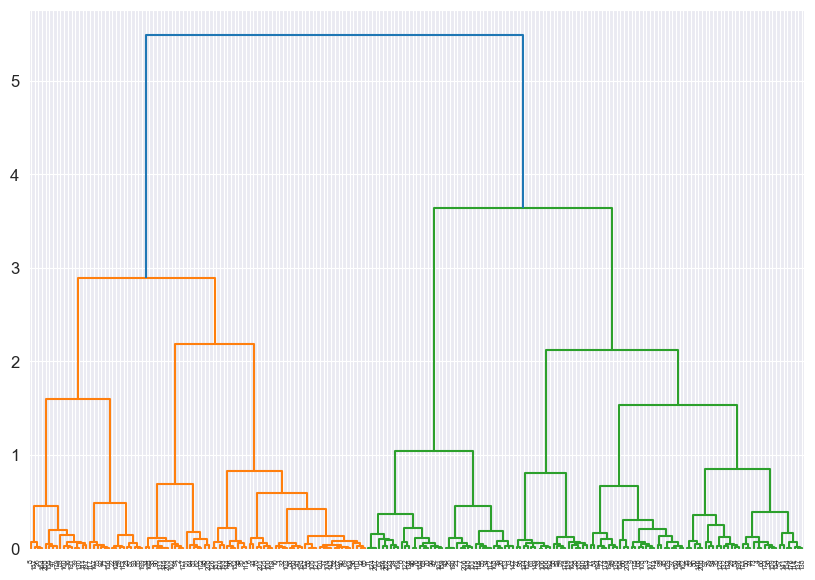

In [19]:
import scipy.cluster.hierarchy as shc

dendro = shc.dendrogram((shc.linkage(prin_train, method = 'ward')))
# Looks like 4 clusters to me

In [20]:
agg = AgglomerativeClustering(n_clusters = 4)
agg.fit(prin_train)

AgglomerativeClustering(n_clusters=4)

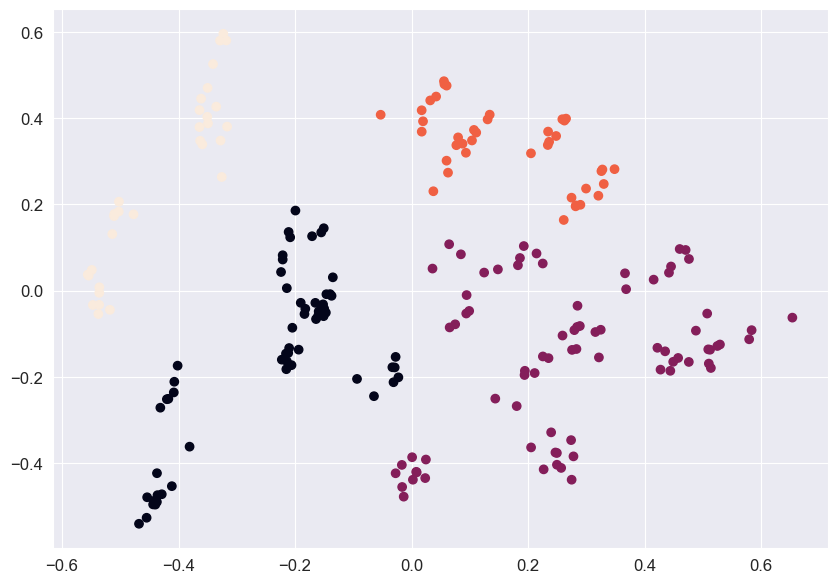

In [21]:
plt.scatter(prin_train['P1'], prin_train['P2'], c = AgglomerativeClustering(n_clusters = 4).fit_predict(prin_train))
plt.show()

In [22]:
print(silhouette_score(prin_train, AgglomerativeClustering(n_clusters = 4).fit_predict(prin_train)))

0.41506981202244714


In [23]:
components = pd.DataFrame((pca.components_).T, columns = ['P1', 'P2'], index = scaled_train.columns)
print(components)
# Once more, the binary data seems to heavily weigh on the results of PCA
# I'm going to try it without them just for consistency

                                P1        P2
age                      -0.016627  0.054660
anaemia                  -0.273802  0.710174
creatinine_phosphokinase  0.012304 -0.044647
diabetes                 -0.414078 -0.583686
ejection_fraction        -0.083787 -0.043822
high_blood_pressure      -0.057097  0.304510
platelets                -0.052056 -0.023718
serum_creatinine         -0.001037  0.013156
serum_sodium             -0.073803  0.000727
sex                       0.676788 -0.035779
smoking                   0.517051 -0.059134
time                     -0.096553 -0.223211


In [24]:
normal_train = normalize(scaled_no_bin)
normal_train = pd.DataFrame(data = normal_train)

In [25]:
pca = PCA(n_components = 2)
prin_train = pca.fit_transform(normal_train)
prin_train = pd.DataFrame(prin_train)
prin_train.columns = ['P1', 'P2']

prin_train.head()

,P1,P2
0,0.348378,-0.049538
1,0.133354,0.116177
2,0.108945,0.310660
3,0.357478,-0.212762
4,-0.059595,-0.156909


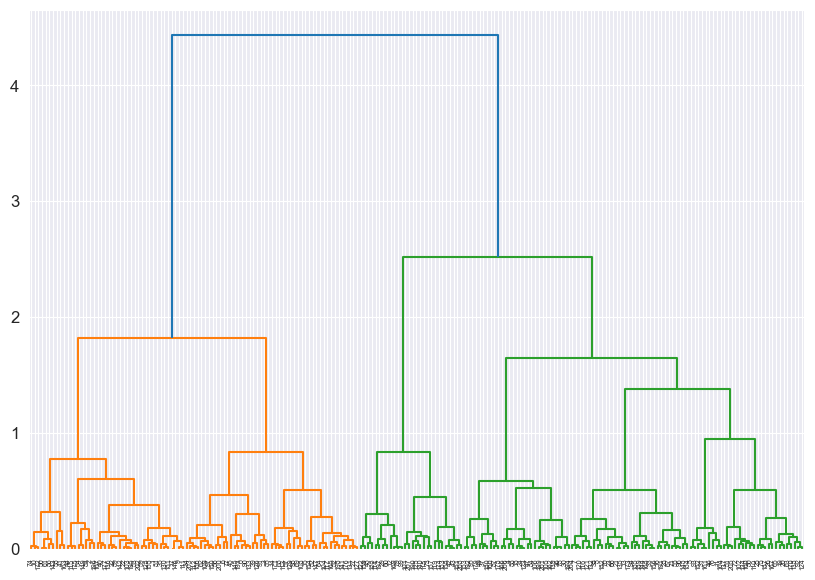

In [26]:
import scipy.cluster.hierarchy as shc

dendro = shc.dendrogram((shc.linkage(prin_train, method = 'ward')))
# Looks like 3 clusters this time around

In [27]:
print(silhouette_score(prin_train, AgglomerativeClustering(n_clusters = 3).fit_predict(prin_train)))
# Slightly lower silhouette score, worth noting

0.3839298909319379


In [28]:
components = pd.DataFrame((pca.components_).T, columns = ['P1', 'P2'], index = scaled_no_bin.columns)
print(components)
# Without the binary data, once again age and serum_sodium edge out the other components, with ejection_fraction hanging in there on P2 and time being a massive influence on P1

                                P1        P2
age                      -0.493188  0.757941
creatinine_phosphokinase  0.014866 -0.095323
ejection_fraction        -0.033645 -0.157232
platelets                -0.089670 -0.170039
serum_creatinine         -0.096908  0.093724
serum_sodium             -0.128853 -0.476768
time                      0.849339  0.355967


In [33]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(scaled_train)
labels_train = dbscan.labels_
silhouette_score_train = silhouette_score(scaled_train, labels_train)
print("Silhouette score for training set:", silhouette_score_train)

labels_test = dbscan.fit_predict(scaled_test)

silhouette_score_test = silhouette_score(scaled_test, labels_test)
print("Silhouette score for test set:", silhouette_score_test)
print(labels_train)

Silhouette score for training set: 0.4446873422824321
Silhouette score for test set: 0.35975672468001874
[ 0  1  2  3  4  4  5  6  7  3  1  8  1  9  2 10 11 12 13  9  9  6 14 14
  8  6  7 15 16 17  4 -1  1 15  9 17  1  3  2 11 12  1  0  6  3  3  0 11
 18 19  4  2 12 16 17 14  0 20 16 16  3 15 18  0 18  1  4 -1  3 12  0 21
 19  4  4 21  0 19 -1 -1 10 18 10 11 19  9  1 14 12 14  2  2 21 14 -1 13
 22 -1 15  3  5  0  2  1 12 12 15  3  3 14  1 -1  9 14 20 13  9 21 17  5
 12 12  0  8  8  5 13 12 17  3 11  2 17 17 15 19  0 20 20 16 16 20 12  3
 22  2 10  9  6 15  1  6 15  9  4  7 21 12  3  4 11 16  3 12  7  2 15 21
  9  8 -1  4 18  4 19  3  4  2 16 11  3 13 22 16  4 16  8  7  0  0  6 11
 15 13 19 19 17 11  1 14 10  5  8  2  3 11  6  8 18]


In [30]:
dbscan = DBSCAN(eps=.4, min_samples=5)
dbscan.fit(scaled_no_bin)
labels_train_no_bin = dbscan.labels_
silhouette_score_train = silhouette_score(scaled_no_bin, labels_train_no_bin)
print("Silhouette score for training set:", silhouette_score_train)

labels_test_no_bin = dbscan.fit_predict(scaled_no_bin_test)

silhouette_score_test = silhouette_score(scaled_no_bin_test, labels_test_no_bin)
print("Silhouette score for test set:", silhouette_score_test)
print(labels_train_no_bin)
# I can't find a good set of clusters for non-binary results, so I'm gonna stick with the ones that use the binary variables

Silhouette score for training set: 0.3736104881747778
Silhouette score for test set: 0.27282775633092143
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


[ 0  1  2  3  4  4  5  6  7  3  1  8  1  9  2 10 11 12 13  9  9  6 14 14
  8  6  7 15 16 17  4 -1  1 15  9 17  1  3  2 11 12  1  0  6  3  3  0 11
 18 19  4  2 12 16 17 14  0 20 16 16  3 15 18  0 18  1  4 -1  3 12  0 21
 19  4  4 21  0 19 -1 -1 10 18 10 11 19  9  1 14 12 14  2  2 21 14 -1 13
 22 -1 15  3  5  0  2  1 12 12 15  3  3 14  1 -1  9 14 20 13  9 21 17  5
 12 12  0  8  8  5 13 12 17  3 11  2 17 17 15 19  0 20 20 16 16 20 12  3
 22  2 10  9  6 15  1  6 15  9  4  7 21 12  3  4 11 16  3 12  7  2 15 21
  9  8 -1  4 18  4 19  3  4  2 16 11  3 13 22 16  4 16  8  7  0  0  6 11
 15 13 19 19 17 11  1 14 10  5  8  2  3 11  6  8 18]


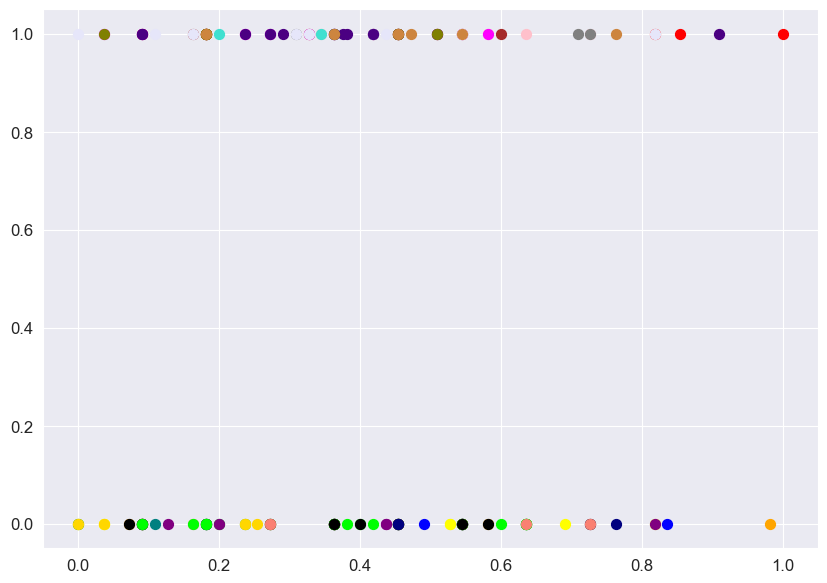

In [34]:
y_preds = dbscan.fit_predict(scaled_train)
a = scaled_train.values
print(dbscan.labels_)

plt.scatter(a[y_preds == 0, 0], a[y_preds == 0, 1], s = 50, c = 'red', label='cluster 1')
plt.scatter(a[y_preds == 1, 0], a[y_preds == 1, 1], s = 50, c = 'blue', label='cluster 2')
plt.scatter(a[y_preds == 2, 0], a[y_preds == 2, 1], s = 50, c = 'green', label='cluster 3')
plt.scatter(a[y_preds == 3, 0], a[y_preds == 3, 1], s = 50, c = 'yellow', label='cluster 4')
plt.scatter(a[y_preds == 4, 0], a[y_preds == 4, 1], s = 50, c = 'purple', label='cluster 5')
plt.scatter(a[y_preds == 5, 0], a[y_preds == 5, 1], s = 50, c = 'orange', label='cluster 6')
plt.scatter(a[y_preds == 6, 0], a[y_preds == 6, 1], s = 50, c = 'pink', label='cluster 7')
plt.scatter(a[y_preds == 7, 0], a[y_preds == 7, 1], s = 50, c = 'brown', label='cluster 8')
plt.scatter(a[y_preds == 8, 0], a[y_preds == 8, 1], s = 50, c = 'gray', label='cluster 9')
plt.scatter(a[y_preds == 9, 0], a[y_preds == 9, 1], s = 50, c = 'magenta', label='cluster 10')
plt.scatter(a[y_preds == 10, 0], a[y_preds == 10, 1], s = 50, c = 'turquoise', label='cluster 11')
plt.scatter(a[y_preds == 11, 0], a[y_preds == 11, 1], s = 50, c = 'lavender', label='cluster 12')
plt.scatter(a[y_preds == 12, 0], a[y_preds == 12, 1], s = 50, c = 'indigo', label='cluster 13')
plt.scatter(a[y_preds == 13, 0], a[y_preds == 13, 1], s = 50, c = 'teal', label='cluster 14')
plt.scatter(a[y_preds == 14, 0], a[y_preds == 14, 1], s = 50, c = 'olive', label='cluster 15')
plt.scatter(a[y_preds == 15, 0], a[y_preds == 15, 1], s = 50, c = 'gold', label='cluster 16')
plt.scatter(a[y_preds == 16, 0], a[y_preds == 16, 1], s = 50, c = 'navy', label='cluster 17')
plt.scatter(a[y_preds == 17, 0], a[y_preds == 17, 1], s = 50, c = 'lime', label='cluster 18')
plt.scatter(a[y_preds == 18, 0], a[y_preds == 18, 1], s = 50, c = 'salmon', label='cluster 19')
plt.scatter(a[y_preds == 19, 0], a[y_preds == 19, 1], s = 50, c = 'lime', label='cluster 20')
plt.scatter(a[y_preds == 20, 0], a[y_preds == 20, 1], s = 50, c = 'black', label='cluster 21')
plt.scatter(a[y_preds == 21, 0], a[y_preds == 21, 1], s = 50, c = 'peru', label='cluster 22')
plt.show()

In [32]:
# Unfortunately DBSCAN has not provided much information, but I am going to press forward with my analysis

The purpose of this clustering analysis was to try and determine if there were any variables that carried a heavy influence on the results of the death of a patient. Unfortunately, none of the models provided an overwhelmingly strong accuracy rate, so the analysis will be largely based on inferences and comparisons back to prior analysis of data. That being said, the results found in this project corroborate earlier results suggesting the importance of both age and serum sodium as factors for death as a result of heart disease. A footnote must be made however. KMeans clustering and Hierarchical clustering were both performed twice as a result of the binary data being overwhelmingly influencial on the results.

That being said, this data shows that across both logistic regressions and clustering, age and serum sodium are extreme risk factors that could influence the end result of a patient's survival. For our stakeholder, this urges them to focus on their older patients more intently and to actively monitor the patient's serum sodium levels. Both risk factors are ones that are already well associated with heart disease, providing further evidence to back up our findings. Focusing on these factors primarily will ideally prevent high-risk patients from falling through the cracks and increase their survival rate.